# Data Analysis with NumPy and Pandas

## Introduction

## Learning Objectives

## Introduction to NumPy

### Creating NumPy Arrays

In [1]:
import numpy as np

In [2]:
elevation_readings = np.array([245, 312, 156, 423, 678])
print(f"1D Array (elevation readings): {elevation_readings}")
print(f"Data type: {elevation_readings.dtype}")
print(f"Array shape: {elevation_readings.shape}")

1D Array (elevation readings): [245 312 156 423 678]
Data type: int64
Array shape: (5,)


In [3]:
# Each row represents one location: [latitude, longitude]
coordinates = np.array(
    [[35.6895, 139.6917], [40.7128, -74.0060], [51.5074, -0.1278]]  # Tokyo  # New York
)  # London
print(f"2D Array (city coordinates):\n{coordinates}")
print(f"Array shape: {coordinates.shape}")  # (3 rows, 2 columns)
print(f"Number of cities: {coordinates.shape[0]}")

2D Array (city coordinates):
[[ 3.568950e+01  1.396917e+02]
 [ 4.071280e+01 -7.400600e+01]
 [ 5.150740e+01 -1.278000e-01]]
Array shape: (3, 2)
Number of cities: 3


In [4]:
# For example, you might create a grid to store calculated distances
distance_matrix = np.zeros((3, 3))
print(f"Distance matrix (initialized with zeros):\n{distance_matrix}")
print(f"This could store distances between {distance_matrix.shape[0]} cities")

Distance matrix (initialized with zeros):
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
This could store distances between 3 cities


In [5]:
# You can multiply by any number to get arrays filled with that value
weights = np.ones((2, 4)) * 0.5  # Array filled with 0.5
print(f"Array of weights (0.5):\n{weights}")

# Or create an array for marking valid data points
valid_data_flags = np.ones((5,), dtype=bool)  # All True initially
print(f"Data validity flags: {valid_data_flags}")

Array of weights (0.5):
[[0.5 0.5 0.5 0.5]
 [0.5 0.5 0.5 0.5]]
Data validity flags: [ True  True  True  True  True]


In [6]:
# For example, creating a series of years for time series analysis
years = np.arange(2010, 2021, 1)  # From 2010 to 2020, step by 1
print(f"Years array: {years}")

# Or creating latitude values for a grid
latitudes = np.arange(-90, 91, 30)  # From -90 to 90 degrees, every 30 degrees
print(f"Latitude grid: {latitudes}")

# You can also use linspace for evenly spaced values
longitudes = np.linspace(-180, 180, 7)  # 7 evenly spaced values from -180 to 180
print(f"Longitude grid: {longitudes}")

Years array: [2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020]
Latitude grid: [-90 -60 -30   0  30  60  90]
Longitude grid: [-180. -120.  -60.    0.   60.  120.  180.]


### Basic Array Operations

In [7]:
# Element-wise addition - add the same value to every element
# Example: adjusting elevation readings by adding a reference height
elevation_readings = np.array([245, 312, 156, 423, 678])
sea_level_adjustment = elevation_readings + 10  # Add 10 meters to all readings
print(f"Original elevations: {elevation_readings}")
print(f"Adjusted elevations: {sea_level_adjustment}")

Original elevations: [245 312 156 423 678]
Adjusted elevations: [255 322 166 433 688]


In [8]:
# Element-wise multiplication - multiply every element by the same value
# Example: converting elevation from meters to feet (1 meter = 3.28084 feet)
elevations_meters = np.array([245, 312, 156, 423, 678])
elevations_feet = elevations_meters * 3.28084
print(f"Elevations in meters: {elevations_meters}")
print(f"Elevations in feet: {elevations_feet.round(1)}")  # Round to 1 decimal place

# You can also add, subtract, and divide arrays by scalars
temperatures_celsius = np.array([15.5, 22.3, 8.9, 31.2])
temperatures_fahrenheit = temperatures_celsius * 9 / 5 + 32
print(f"Temperatures in Celsius: {temperatures_celsius}")
print(f"Temperatures in Fahrenheit: {temperatures_fahrenheit.round(1)}")

Elevations in meters: [245 312 156 423 678]
Elevations in feet: [ 803.8 1023.6  511.8 1387.8 2224.4]
Temperatures in Celsius: [15.5 22.3  8.9 31.2]
Temperatures in Fahrenheit: [59.9 72.1 48.  88.2]


In [9]:
# Operations between arrays - element-wise operations between two arrays
# Example: calculating weighted coordinates
coordinates = np.array(
    [[35.6895, 139.6917], [40.7128, -74.0060], [51.5074, -0.1278]]  # Tokyo  # New York
)  # London

# Apply different weights to latitude and longitude (useful for some projections)
weights = np.array([1.0, 0.8])  # Weight latitude normally, reduce longitude weight
weighted_coords = coordinates * weights
print(f"Original coordinates:\n{coordinates}")
print(f"Weighted coordinates:\n{weighted_coords}")

# You can also perform operations between arrays of the same shape
coord_differences = coordinates - coordinates[0]  # Distance from first city (Tokyo)
print(f"Coordinate differences from Tokyo:\n{coord_differences}")

Original coordinates:
[[ 3.568950e+01  1.396917e+02]
 [ 4.071280e+01 -7.400600e+01]
 [ 5.150740e+01 -1.278000e-01]]
Weighted coordinates:
[[ 3.5689500e+01  1.1175336e+02]
 [ 4.0712800e+01 -5.9204800e+01]
 [ 5.1507400e+01 -1.0224000e-01]]
Coordinate differences from Tokyo:
[[   0.        0.    ]
 [   5.0233 -213.6977]
 [  15.8179 -139.8195]]


### Reshaping Arrays

In [10]:
# Example: Reshape coordinate data received as a flat list
# Imagine you received GPS data as: [lat1, lon1, lat2, lon2, lat3, lon3]
flat_coordinates = np.array([35.6895, 139.6917, 40.7128, -74.0060, 51.5074, -0.1278])
print(f"Flat coordinate data: {flat_coordinates}")

# Reshape into coordinate pairs (3 rows, 2 columns)
coordinate_pairs = flat_coordinates.reshape((3, 2))
print(f"Reshaped into coordinate pairs:\n{coordinate_pairs}")

# Alternatively, you can use -1 to let NumPy calculate one dimension
# This is useful when you know you want pairs but don't know how many
coordinate_pairs_auto = flat_coordinates.reshape(-1, 2)
print(f"Auto-calculated rows: {coordinate_pairs_auto.shape}")

Flat coordinate data: [ 3.568950e+01  1.396917e+02  4.071280e+01 -7.400600e+01  5.150740e+01
 -1.278000e-01]
Reshaped into coordinate pairs:
[[ 3.568950e+01  1.396917e+02]
 [ 4.071280e+01 -7.400600e+01]
 [ 5.150740e+01 -1.278000e-01]]
Auto-calculated rows: (3, 2)


In [11]:
# Understanding array properties
print(f"Original flat array shape: {flat_coordinates.shape}")
print(f"Reshaped array shape: {coordinate_pairs.shape}")
print(
    f"Total elements (should be the same): {flat_coordinates.size} vs {coordinate_pairs.size}"
)

# You can also flatten a multidimensional array back to 1D
flattened_again = coordinate_pairs.flatten()
print(f"Flattened back to 1D: {flattened_again}")

Original flat array shape: (6,)
Reshaped array shape: (3, 2)
Total elements (should be the same): 6 vs 6
Flattened back to 1D: [ 3.568950e+01  1.396917e+02  4.071280e+01 -7.400600e+01  5.150740e+01
 -1.278000e-01]


### Mathematical Functions on Arrays

In [13]:
# Mathematical functions applied to arrays
distances_squared = np.array([100, 400, 900, 1600, 2500])  # Squared distances in km²
actual_distances = np.sqrt(distances_squared)  # Calculate actual distances
print(f"Squared distances: {distances_squared}")
print(f"Actual distances: {actual_distances}")

# Trigonometric functions - essential for coordinate conversions
angles_degrees = np.array([0, 30, 45, 60, 90])
angles_radians = np.radians(angles_degrees)  # Convert to radians first
sine_values = np.sin(angles_radians)
cosine_values = np.cos(angles_radians)
print(f"Angles (degrees): {angles_degrees}")
print(f"Sine values: {sine_values.round(3)}")
print(f"Cosine values: {cosine_values.round(3)}")

Squared distances: [ 100  400  900 1600 2500]
Actual distances: [10. 20. 30. 40. 50.]
Angles (degrees): [ 0 30 45 60 90]
Sine values: [0.    0.5   0.707 0.866 1.   ]
Cosine values: [1.    0.866 0.707 0.5   0.   ]


In [ ]:
# Logarithmic and exponential functions
population_data = np.array([100000, 500000, 1000000, 5000000, 10000000])
# Log transformation is often used to normalize highly skewed data like population
log_population = np.log10(population_data)  # Base-10 logarithm
print(f"Population data: {population_data}")
print(f"Log10 of population: {log_population.round(2)}")

# Exponential functions
growth_rates = np.array([0.01, 0.02, 0.03, 0.05])  # 1%, 2%, 3%, 5% growth rates
exponential_growth = np.exp(growth_rates)  # e^x
print(f"Growth rates: {growth_rates}")
print(f"Exponential factors: {exponential_growth.round(3)}")

### Statistical Operations

In [14]:
elevation_profile = np.array(
    [1245, 1367, 1423, 1389, 1456, 1502, 1478, 1398, 1334, 1278]
)

# Basic descriptive statistics
mean_elevation = np.mean(elevation_profile)
median_elevation = np.median(elevation_profile)
std_elevation = np.std(elevation_profile)
min_elevation = np.min(elevation_profile)
max_elevation = np.max(elevation_profile)

print(f"Elevation Profile Statistics:")
print(f"Mean elevation: {mean_elevation:.1f} meters")
print(f"Median elevation: {median_elevation:.1f} meters")
print(f"Standard deviation: {std_elevation:.1f} meters")
print(f"Elevation range: {min_elevation} - {max_elevation} meters")
print(f"Total elevation gain: {max_elevation - min_elevation} meters")

# Percentiles help understand the distribution
percentiles = np.percentile(elevation_profile, [25, 50, 75])
print(f"25th, 50th, 75th percentiles: {percentiles}")

Elevation Profile Statistics:
Mean elevation: 1387.0 meters
Median elevation: 1393.5 meters
Standard deviation: 79.3 meters
Elevation range: 1245 - 1502 meters
Total elevation gain: 257 meters
25th, 50th, 75th percentiles: [1342.25 1393.5  1447.75]


### Random Data Generation for Simulation

In [15]:
# Set a seed for reproducible results (useful for testing)
np.random.seed(42)

# Generate random coordinates within realistic bounds
# Latitudes: -90 to 90 degrees, Longitudes: -180 to 180 degrees
n_points = 5
random_latitudes = np.random.uniform(-90, 90, n_points)
random_longitudes = np.random.uniform(-180, 180, n_points)

print(f"Random coordinates:")
for i in range(n_points):
    print(f"Point {i+1}: ({random_latitudes[i]:.4f}, {random_longitudes[i]:.4f})")

Random coordinates:
Point 1: (-22.5828, -123.8420)
Point 2: (81.1286, -159.0899)
Point 3: (41.7589, 131.8234)
Point 4: (17.7585, 36.4014)
Point 5: (-61.9166, 74.9061)


In [16]:
temperature_base = 20  # Base temperature in Celsius
temperature_readings = np.random.normal(
    temperature_base, 3, 10
)  # Mean=20, std=3, 10 readings
print(f"\nSimulated temperature readings (°C):")
print(temperature_readings.round(1))

# Generate random integers - useful for sampling or indexing
random_indices = np.random.randint(0, 100, 5)  # Random integers between 0 and 99
print(f"\nRandom sample indices: {random_indices}")


Simulated temperature readings (°C):
[18.6 21.6 18.6 18.6 20.7 14.3 14.8 18.3 17.  20.9]

Random sample indices: [91 59 79 14 61]


### Indexing, Slicing, and Iterating

#### Indexing in NumPy

In [17]:
# Create a 1D array of temperatures recorded at different times
temperatures = np.array([15.2, 18.5, 22.1, 19.8, 16.3])

# Accessing the first temperature reading
first_temp = temperatures[0]
print(f"First temperature reading: {first_temp}°C")

# Accessing the last temperature reading (negative indexing)
last_temp = temperatures[-1]
print(f"Last temperature reading: {last_temp}°C")

# Accessing the middle reading
middle_temp = temperatures[2]
print(f"Middle temperature reading: {middle_temp}°C")

First temperature reading: 15.2°C
Last temperature reading: 16.3°C
Middle temperature reading: 22.1°C


In [18]:
# Create a 2D array
arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr_2d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [19]:
# Accessing the element in the first row and second column
element = arr_2d[0, 1]
print(f"Element at row 1, column 2: {element}")

# Accessing the element in the last row and last column
element_last = arr_2d[-1, -1]
print(f"Element at last row, last column: {element_last}")

Element at row 1, column 2: 2
Element at last row, last column: 9


#### Slicing in NumPy

In [ ]:
# Create a 1D array
arr = np.array([10, 20, 30, 40, 50])

# Slice elements from index 1 to 3 (exclusive)
slice_1d = arr[1:4]
print(f"Slice from index 1 to 3: {slice_1d}")

# Slice all elements from index 2 onwards
slice_2d = arr[2:]
print(f"Slice from index 2 onwards: {slice_2d}")

In [ ]:
# Create a 2D array
arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr_2d

In [ ]:
# Slice the first two rows and all columns
slice_2d = arr_2d[:2, :]
print(f"Sliced 2D array (first two rows):\n{slice_2d}")

# Slice the last two rows and the first two columns
slice_2d_partial = arr_2d[1:, :2]
print(f"Sliced 2D array (last two rows, first two columns):\n{slice_2d_partial}")

#### Boolean Indexing

In [20]:
# Create a 1D array
arr = np.array([10, 20, 30, 40, 50])

# Boolean condition to select elements greater than 25
condition = arr > 25
print(f"Boolean condition: {condition}")

# Use the condition to filter the array
filtered_arr = arr[condition]
print(f"Filtered array (elements > 25): {filtered_arr}")

Boolean condition: [False False  True  True  True]
Filtered array (elements > 25): [30 40 50]


#### Iterating Over Arrays

In [ ]:
# Create a 1D array
arr = np.array([10, 20, 30, 40, 50])

# Iterating through the array
for element in arr:
    print(f"Element: {element}")

In [ ]:
# Create a 2D array
arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Iterating through rows of the 2D array
print("Iterating over rows:")
for row in arr_2d:
    print(row)

# Iterating through each element of the 2D array
print("\nIterating over each element:")
for row in arr_2d:
    for element in row:
        print(element, end=" ")

### Modifying Array Elements

In [ ]:
# Create a 1D array
arr = np.array([10, 20, 30, 40, 50])

# Modify the element at index 1
arr[1] = 25
print(f"Modified array: {arr}")

# Modify multiple elements using slicing
arr[2:4] = [35, 45]
print(f"Modified array with slicing: {arr}")

### Working with Geospatial Coordinates

In [21]:
# Array of latitudes and longitudes
coords = np.array([[35.6895, 139.6917], [34.0522, -118.2437], [51.5074, -0.1278]])

# Convert degrees to radians
coords_radians = np.radians(coords)
print(f"Coordinates in radians:\n{coords_radians}")

Coordinates in radians:
[[ 6.22899283e-01  2.43808010e+00]
 [ 5.94323008e-01 -2.06374188e+00]
 [ 8.98973719e-01 -2.23053078e-03]]


## Introduction to Pandas

### Creating Pandas Series and DataFrames

In [22]:
import pandas as pd

In [23]:
# Creating a Series - a labeled one-dimensional array
# This could represent a list of city names with automatic indexing
city_series = pd.Series(["Tokyo", "Los Angeles", "London"], name="City")
print(f"Pandas Series (city names):\n{city_series}")
print(f"Series name: {city_series.name}")
print(f"Series index: {city_series.index.tolist()}")

Pandas Series (city names):
0          Tokyo
1    Los Angeles
2         London
Name: City, dtype: object
Series name: City
Series index: [0, 1, 2]


In [24]:
data = {
    "City": ["Tokyo", "Los Angeles", "London"],
    "Latitude": [35.6895, 34.0522, 51.5074],
    "Longitude": [139.6917, -118.2437, -0.1278],
    "Country": ["Japan", "USA", "UK"],
}
df = pd.DataFrame(data)
print(f"Pandas DataFrame (city information):\n{df}")
print(f"\nDataFrame shape: {df.shape}")  # (rows, columns)
print(f"Column names: {df.columns.tolist()}")
print(f"Data types:\n{df.dtypes}")

Pandas DataFrame (city information):
          City  Latitude  Longitude Country
0        Tokyo   35.6895   139.6917   Japan
1  Los Angeles   34.0522  -118.2437     USA
2       London   51.5074    -0.1278      UK

DataFrame shape: (3, 4)
Column names: ['City', 'Latitude', 'Longitude', 'Country']
Data types:
City          object
Latitude     float64
Longitude    float64
Country       object
dtype: object


In [26]:
display(df)

,City,Latitude,Longitude,Country
0,Tokyo,35.6895,139.6917,Japan
1,Los Angeles,34.0522,-118.2437,USA
2,London,51.5074,-0.1278,UK


### Basic DataFrame Operations

In [27]:
# Selecting a specific column - returns a Series
latitudes = df["Latitude"]
print(f"Latitudes column (Series):\n{latitudes}")
print(f"Type: {type(latitudes)}")

Latitudes column (Series):
0    35.6895
1    34.0522
2    51.5074
Name: Latitude, dtype: float64
Type: <class 'pandas.core.series.Series'>


In [28]:
# Selecting multiple columns - returns a DataFrame
coordinates = df[["Latitude", "Longitude"]]
print(f"\nCoordinates (DataFrame):\n{coordinates}")
print(f"Type: {type(coordinates)}")


Coordinates (DataFrame):
   Latitude  Longitude
0   35.6895   139.6917
1   34.0522  -118.2437
2   51.5074    -0.1278
Type: <class 'pandas.core.frame.DataFrame'>


In [29]:
western_cities = df[df["Longitude"] < 0]
print("Cities in Western Hemisphere:")
print(western_cities)

Cities in Western Hemisphere:
          City  Latitude  Longitude Country
1  Los Angeles   34.0522  -118.2437     USA
2       London   51.5074    -0.1278      UK


In [30]:
northern_western = df[(df["Latitude"] > 40) & (df["Longitude"] < 0)]
print(f"\nNorthern Western cities:\n{northern_western}")

# Filter by text values
usa_cities = df[df["Country"] == "USA"]
print(f"\nUSA cities:\n{usa_cities}")


Northern Western cities:
     City  Latitude  Longitude Country
2  London   51.5074    -0.1278      UK

USA cities:
          City  Latitude  Longitude Country
1  Los Angeles   34.0522  -118.2437     USA


In [31]:
df["Lat_Radians"] = np.radians(df["Latitude"])
df["Lon_Radians"] = np.radians(df["Longitude"])
df

,City,Latitude,Longitude,Country,Lat_Radians,Lon_Radians
0,Tokyo,35.6895,139.6917,Japan,0.622899,2.438080
1,Los Angeles,34.0522,-118.2437,USA,0.594323,-2.063742
2,London,51.5074,-0.1278,UK,0.898974,-0.002231


In [32]:
df["City_Country"] = df["City"] + ", " + df["Country"]
df

,City,Latitude,Longitude,Country,Lat_Radians,Lon_Radians,City_Country
0,Tokyo,35.6895,139.6917,Japan,0.622899,2.438080,"Tokyo, Japan"
1,Los Angeles,34.0522,-118.2437,USA,0.594323,-2.063742,"Los Angeles, USA"
2,London,51.5074,-0.1278,UK,0.898974,-0.002231,"London, UK"


### Grouping and Aggregation

In [33]:
data = {
    "City": ["Tokyo", "Los Angeles", "London", "Paris", "Chicago"],
    "Country": ["Japan", "USA", "UK", "France", "USA"],
    "Population": [37400068, 3970000, 9126366, 2140526, 2665000],
}
df = pd.DataFrame(data)
df

,City,Country,Population
0,Tokyo,Japan,37400068
1,Los Angeles,USA,3970000
2,London,UK,9126366
3,Paris,France,2140526
4,Chicago,USA,2665000


In [34]:
df_grouped = df.groupby("Country")["Population"].sum()
print(f"Total Population by Country:\n{df_grouped}")

Total Population by Country:
Country
France     2140526
Japan     37400068
UK         9126366
USA        6635000
Name: Population, dtype: int64


### Merging DataFrames

In [35]:
df1 = pd.DataFrame(
    {"City": ["Tokyo", "Los Angeles", "London"], "Country": ["Japan", "USA", "UK"]}
)
df2 = pd.DataFrame(
    {
        "City": ["Tokyo", "Los Angeles", "London"],
        "Population": [37400068, 3970000, 9126366],
    }
)

In [36]:
df1

,City,Country
0,Tokyo,Japan
1,Los Angeles,USA
2,London,UK


In [37]:
df2

,City,Population
0,Tokyo,37400068
1,Los Angeles,3970000
2,London,9126366


In [38]:
# Merge the two DataFrames on the 'City' column
df_merged = pd.merge(df1, df2, on="City")
df_merged

,City,Country,Population
0,Tokyo,Japan,37400068
1,Los Angeles,USA,3970000
2,London,UK,9126366


### Handling Missing Data

In [39]:
data_with_nan = {
    "City": ["Tokyo", "Los Angeles", "London", "Paris"],
    "Population": [37400068, 3970000, None, 2140526],
}
df_nan = pd.DataFrame(data_with_nan)
df_nan

,City,Population
0,Tokyo,37400068.0
1,Los Angeles,3970000.0
2,London,NaN
3,Paris,2140526.0


In [40]:
df_filled = df_nan.fillna(df_nan["Population"].mean())
df_filled

,City,Population
0,Tokyo,3.740007e+07
1,Los Angeles,3.970000e+06
2,London,1.450353e+07
3,Paris,2.140526e+06


### Reading Geospatial Data from a CSV File

In [41]:
url = "https://github.com/opengeos/datasets/releases/download/world/world_cities.csv"
df = pd.read_csv(url)
df.head()

,id,name,country,latitude,longitude,population
0,1,Bombo,UGA,0.5833,32.5333,75000
1,2,Fort Portal,UGA,0.6710,30.2750,42670
2,3,Potenza,ITA,40.6420,15.7990,69060
3,4,Campobasso,ITA,41.5630,14.6560,50762
4,5,Aosta,ITA,45.7370,7.3150,34062


In [42]:
np.sum(df["population"])

np.int64(1475534501)

### Creating plots with Pandas

In [43]:
# Load the dataset from an online source
url = "https://raw.githubusercontent.com/pandas-dev/pandas/main/doc/data/air_quality_no2.csv"
air_quality = pd.read_csv(url, index_col=0, parse_dates=True)

# Display the first few rows of the dataset
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


In [44]:
import matplotlib.pyplot as plt

# Set default DPI for all plots
plt.rcParams["figure.dpi"] = 300

<Axes: xlabel='datetime'>

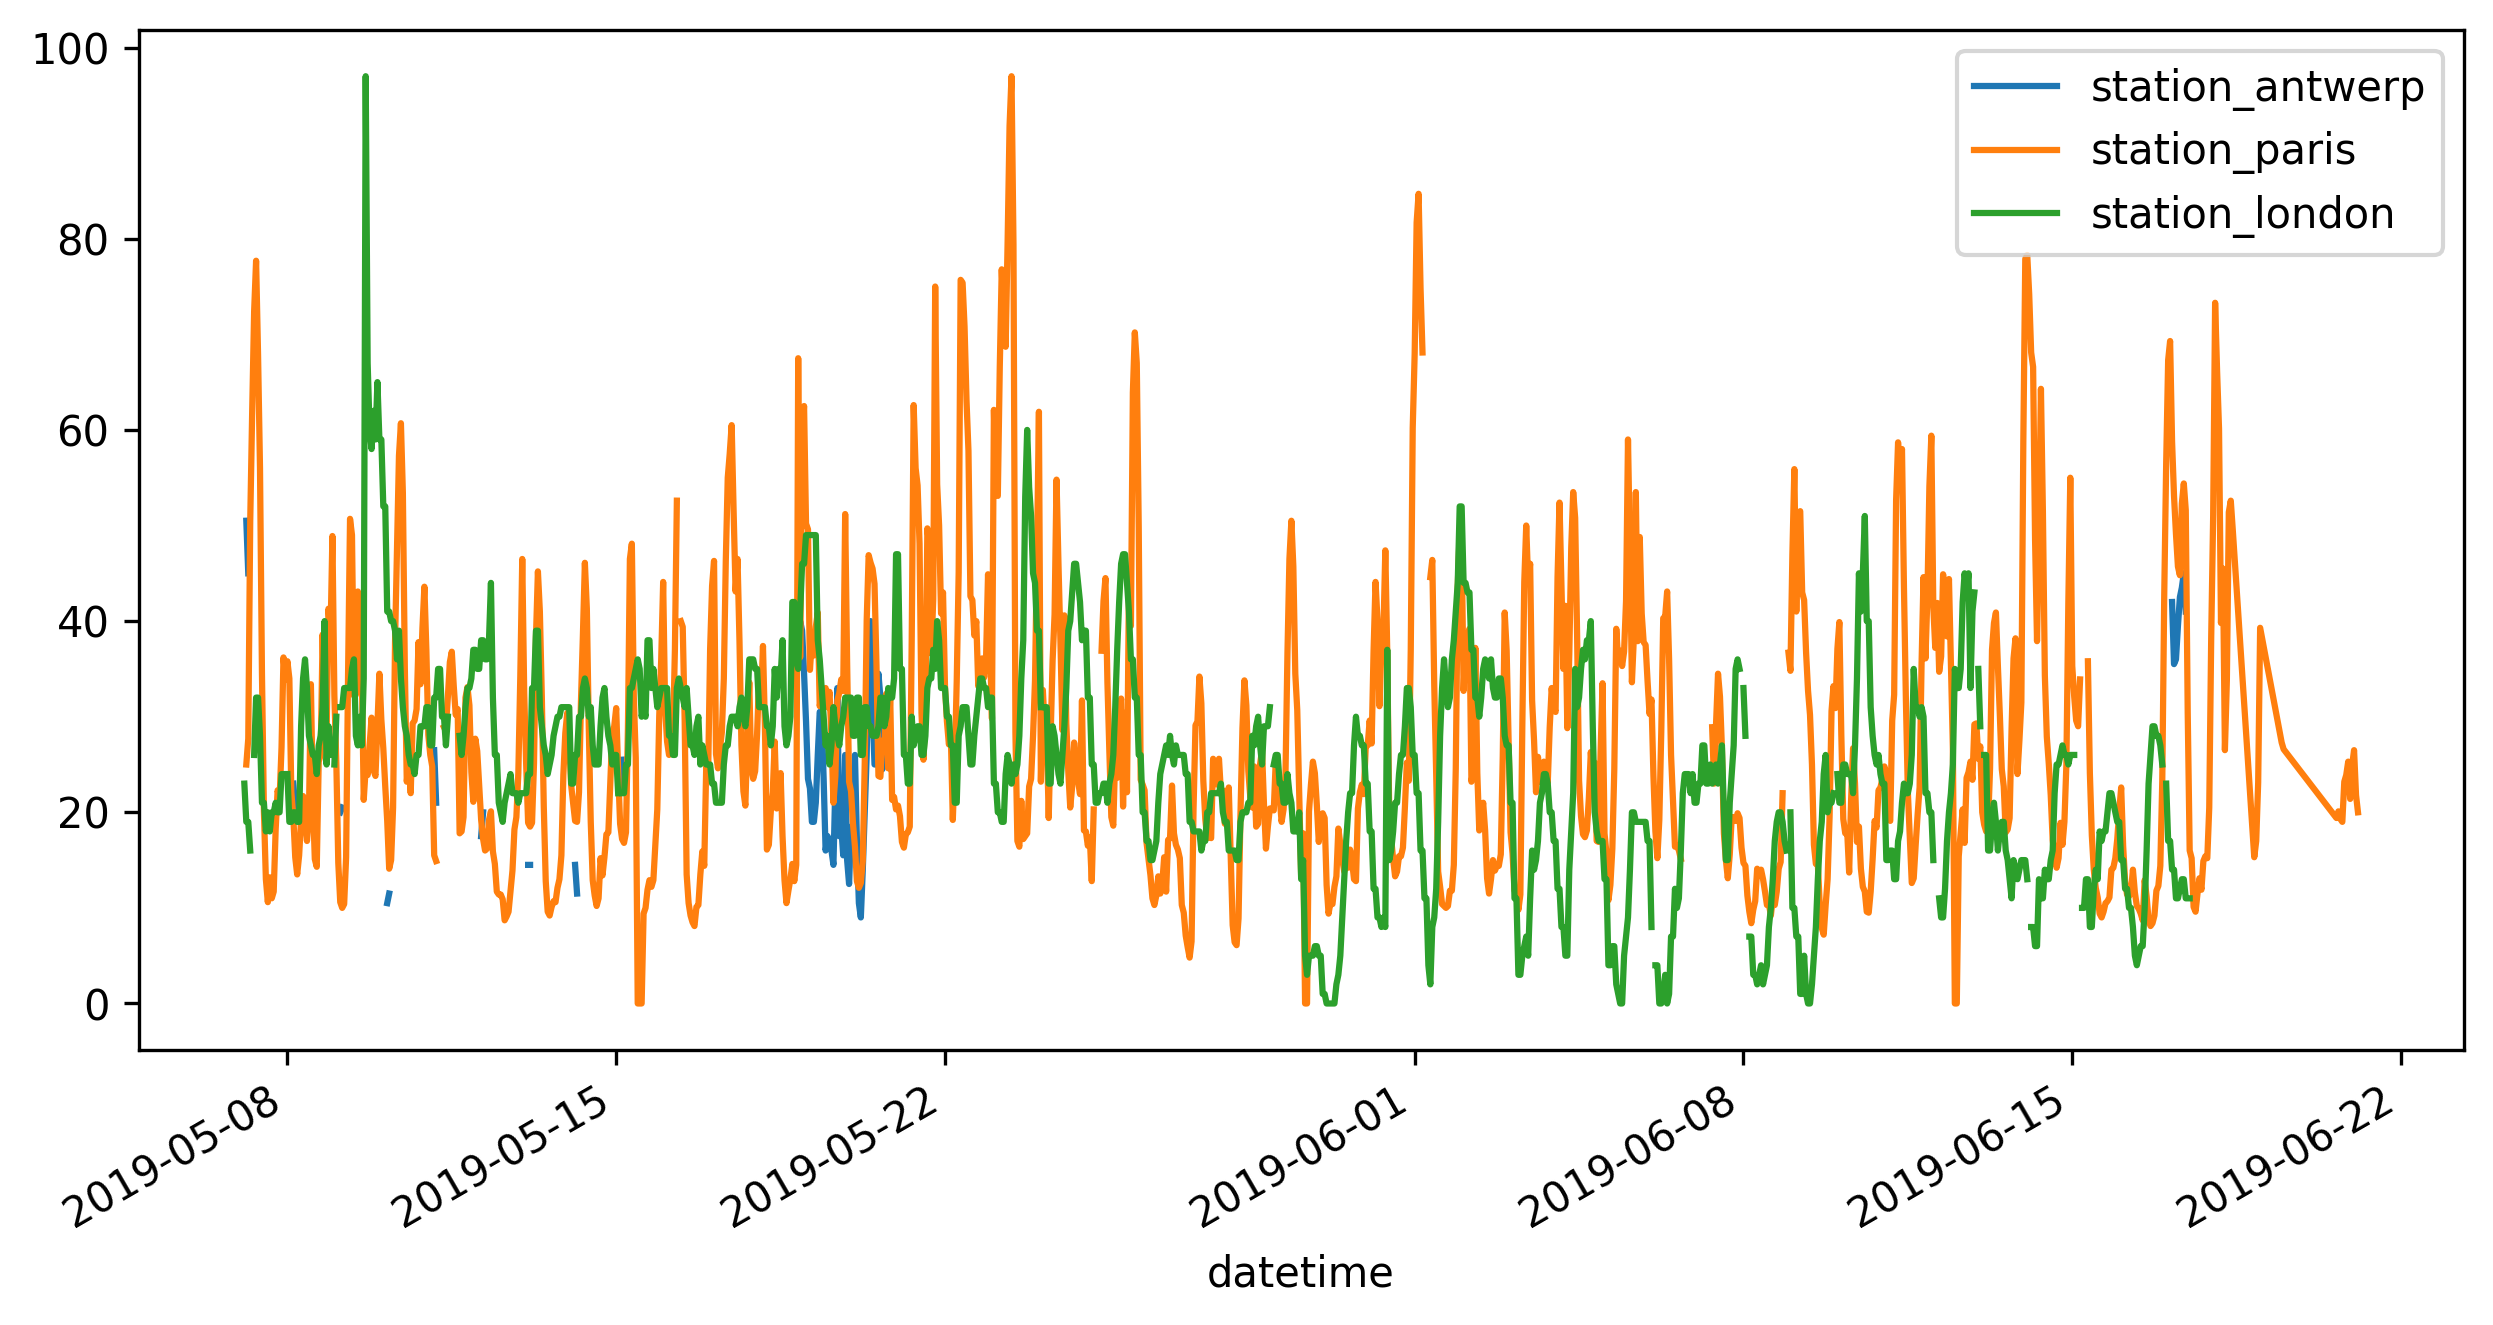

In [45]:
air_quality.plot(figsize=(10, 5))

<Axes: xlabel='datetime'>

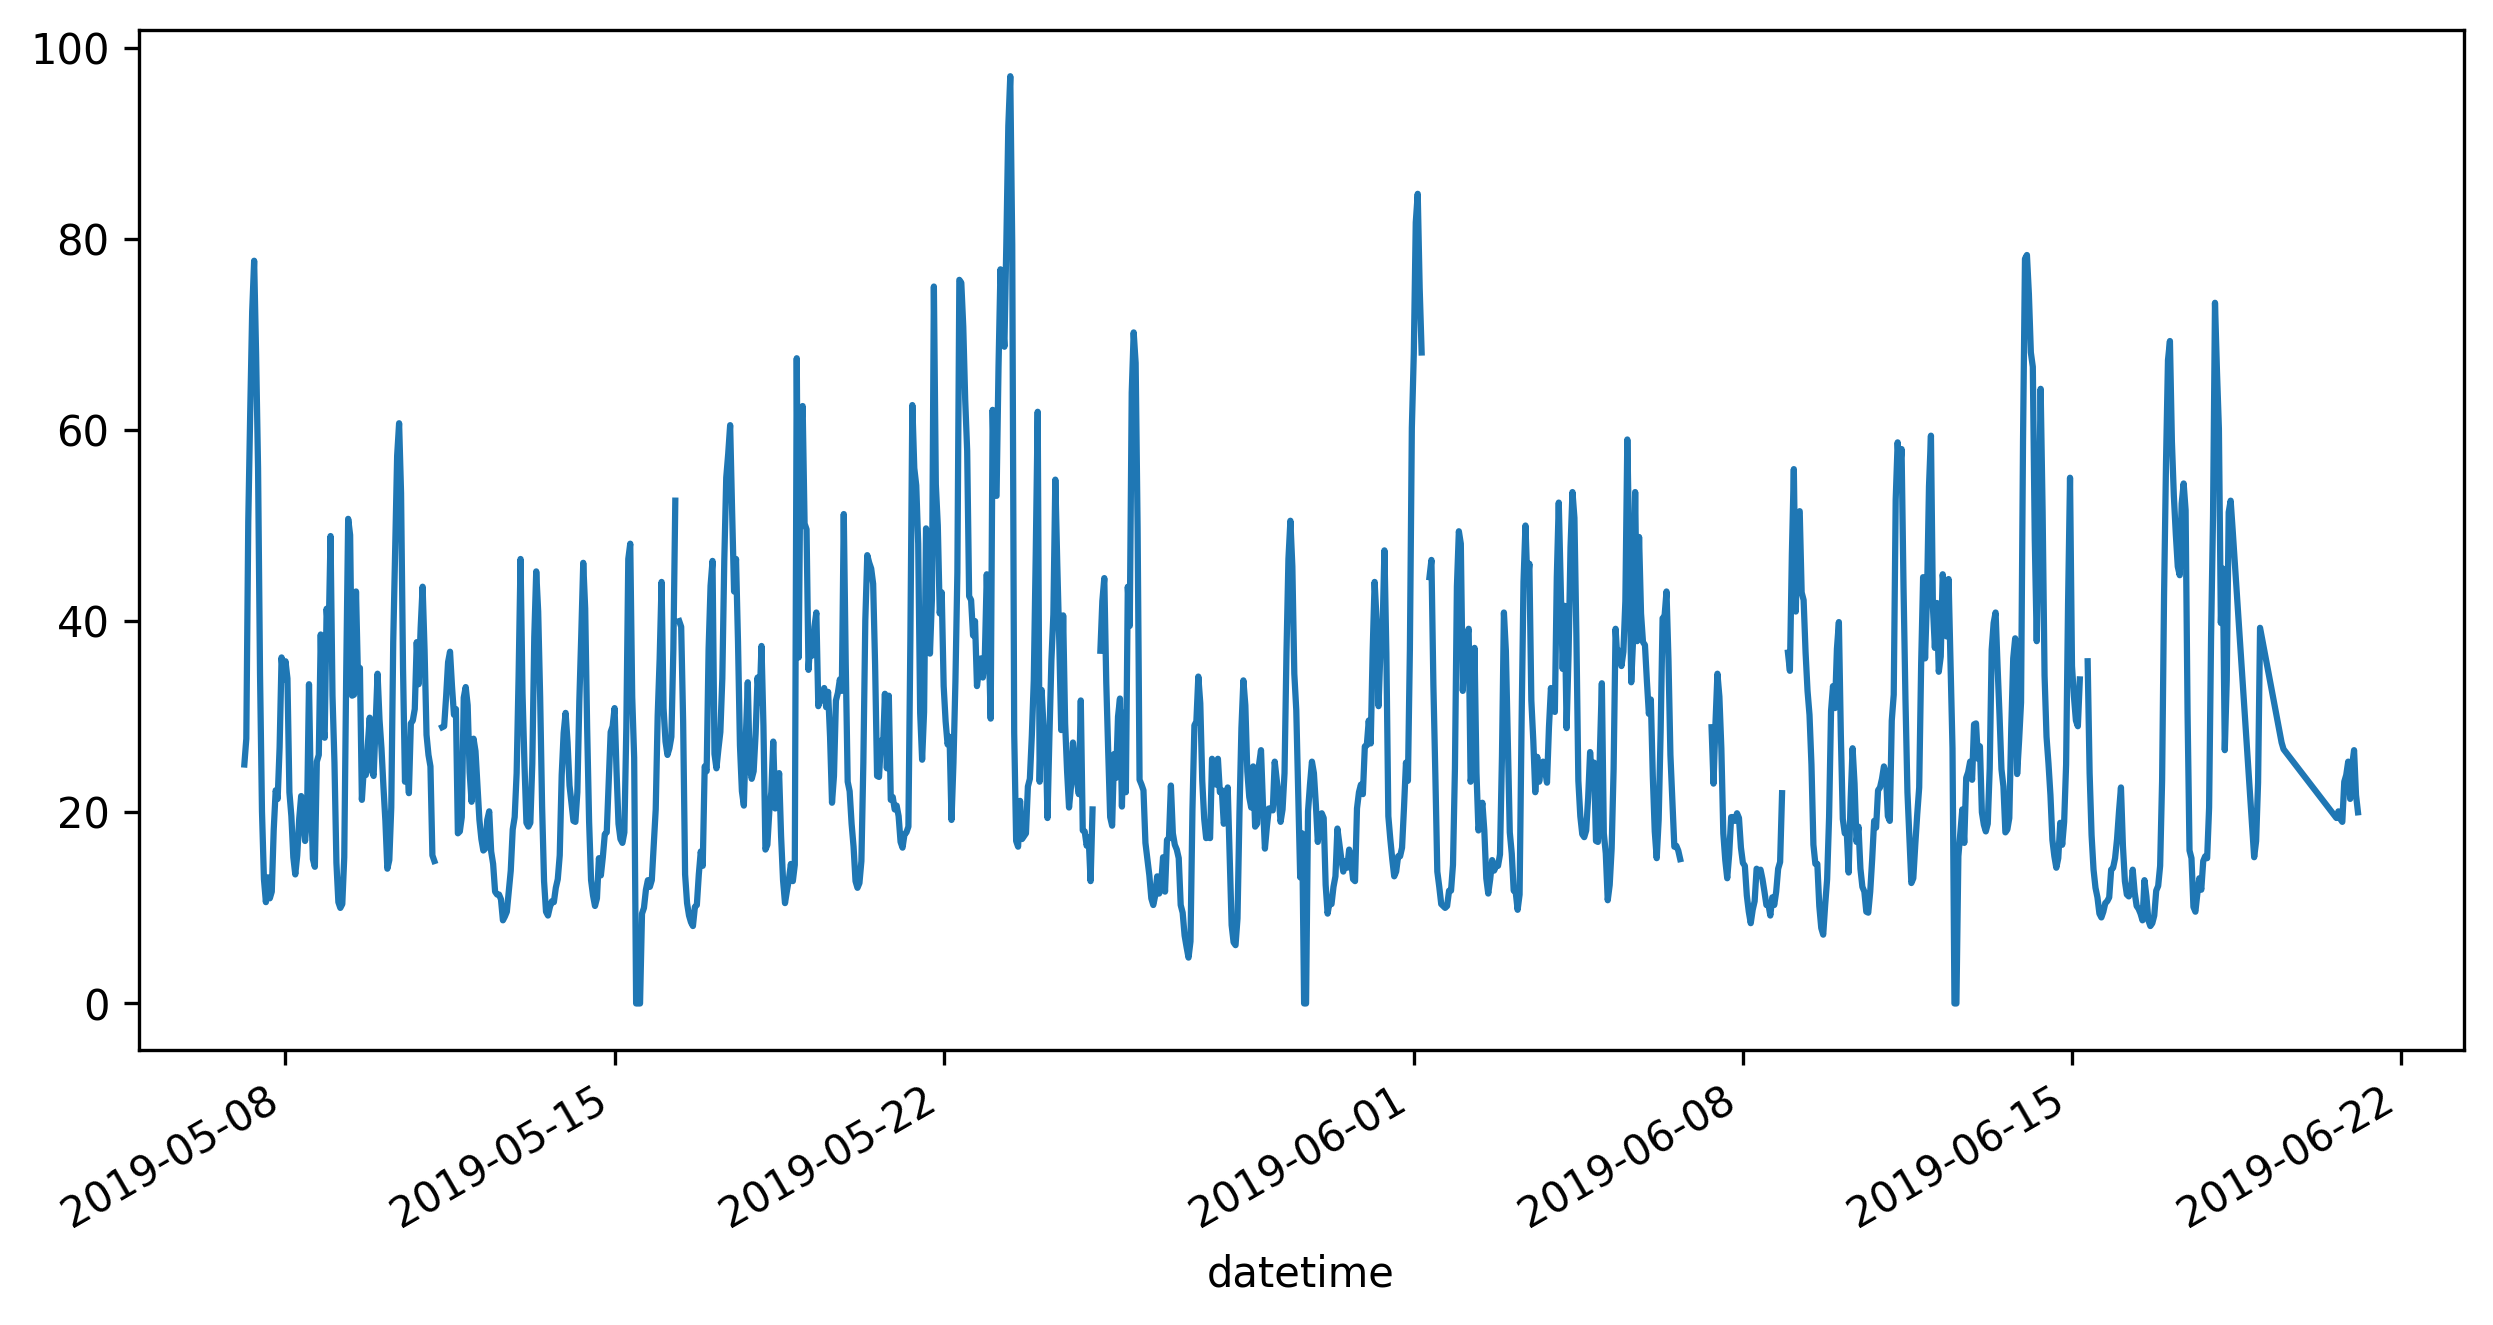

In [46]:
air_quality["station_paris"].plot(figsize=(10, 5))

<Axes: xlabel='station_london', ylabel='station_paris'>

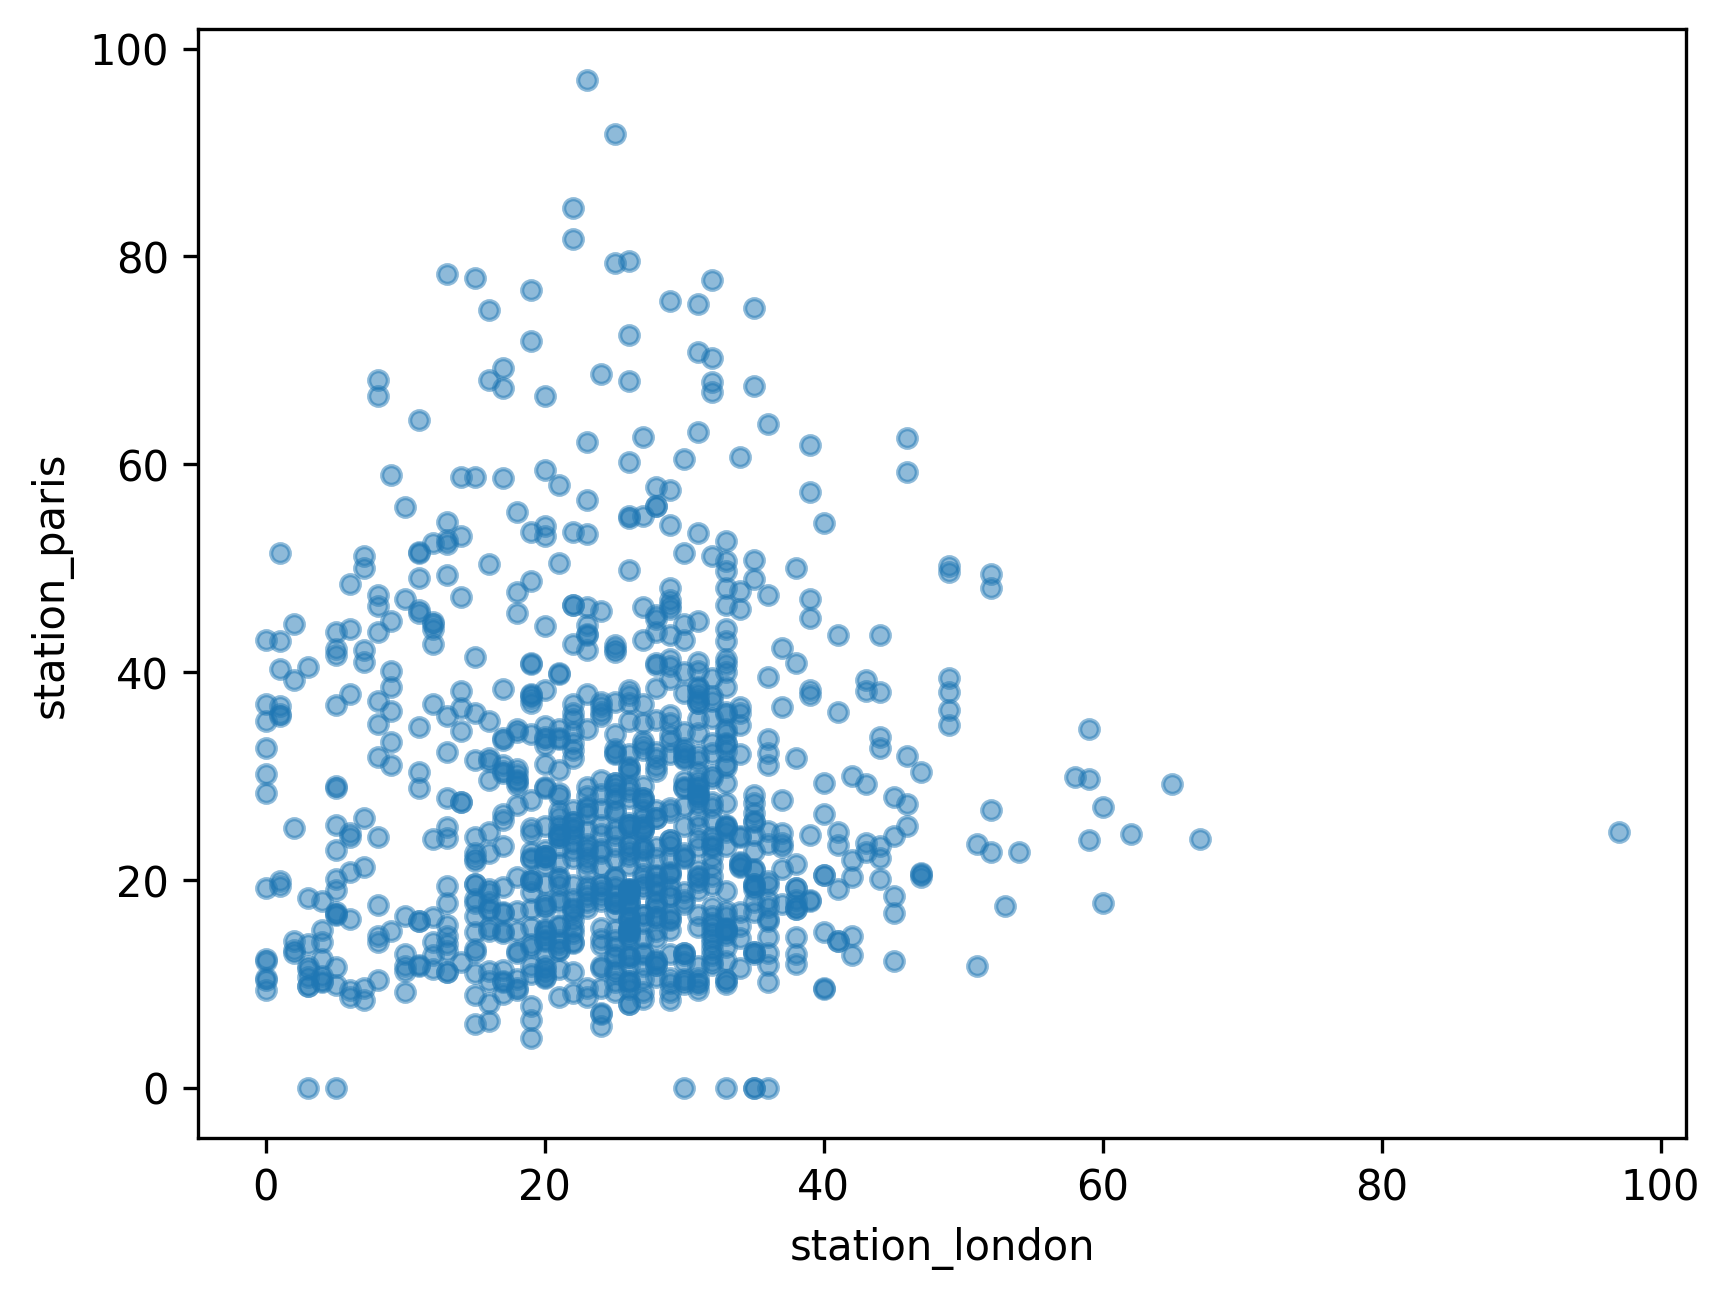

In [47]:
air_quality.plot.scatter(x="station_london", y="station_paris", alpha=0.5)

array([<Axes: xlabel='datetime'>, <Axes: xlabel='datetime'>,
       <Axes: xlabel='datetime'>], dtype=object)

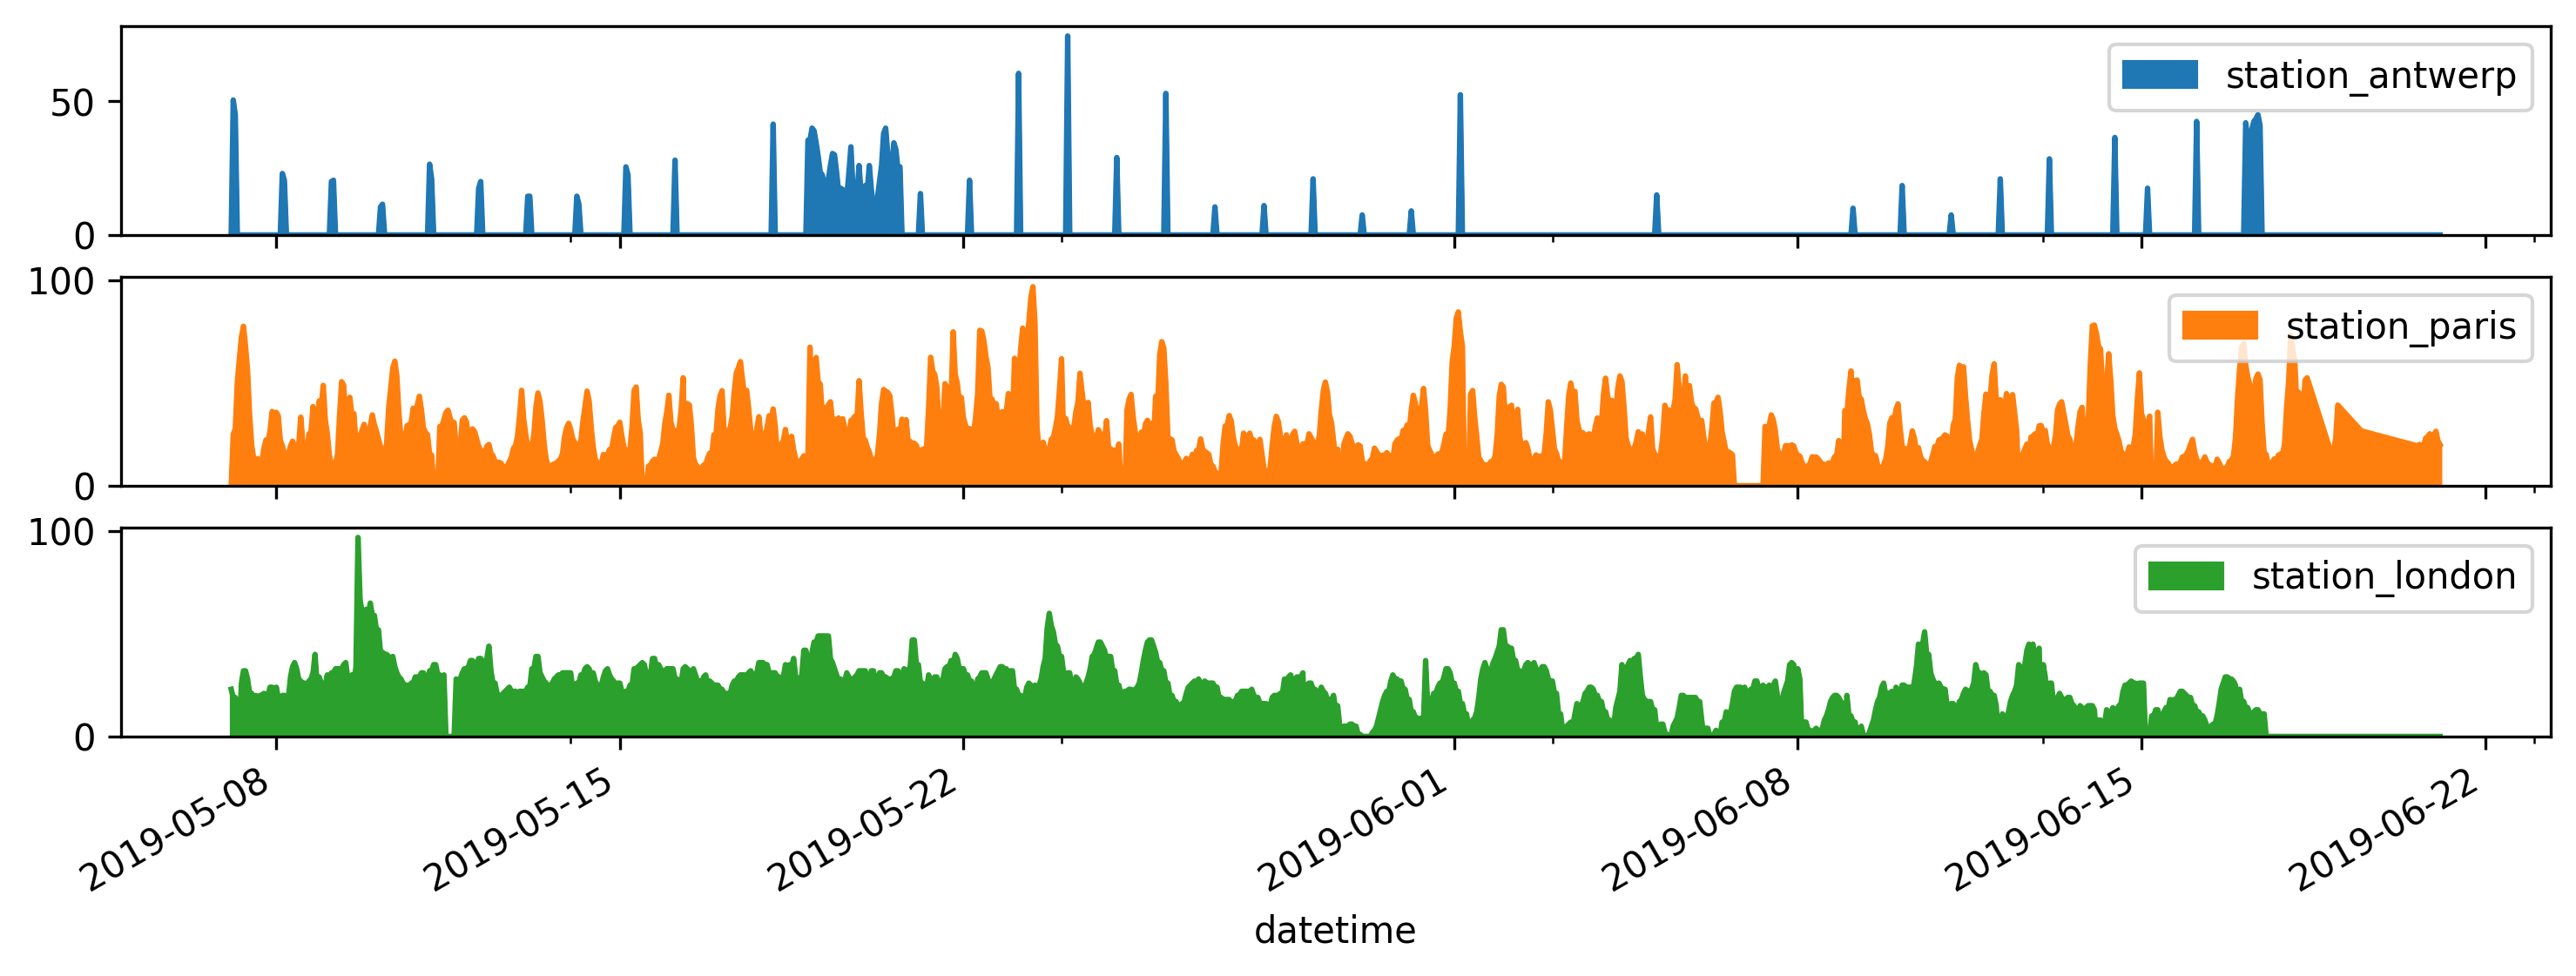

In [48]:
air_quality.plot.area(figsize=(12, 4), subplots=True)

## Combining NumPy and Pandas

In [49]:
# Define the Haversine formula using NumPy
def haversine_np(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in kilometers
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = (
        np.sin(dlat / 2) ** 2
        + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    )
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = R * c
    return distance


# Define a function to calculate distances from a city to all other cities
def calculate_average_distance(df):
    lat1 = df["Latitude"].values
    lon1 = df["Longitude"].values
    lat2, lon2 = np.meshgrid(lat1, lon1)
    distances = haversine_np(lat1, lon1, lat2, lon2)
    avg_distances = np.mean(distances, axis=1)
    return avg_distances


# Creating a DataFrame
data = {
    "City": ["Tokyo", "Los Angeles", "London"],
    "Latitude": [35.6895, 34.0522, 51.5074],
    "Longitude": [139.6917, -118.2437, -0.1278],
}
df = pd.DataFrame(data)

# Apply the function to calculate average distances
df["Avg_Distance_km"] = calculate_average_distance(df)
df

,City,Latitude,Longitude,Avg_Distance_km
0,Tokyo,35.6895,139.6917,5624.601390
1,Los Angeles,34.0522,-118.2437,5294.682354
2,London,51.5074,-0.1278,7041.924003


## Key Takeaways

## Further Reading

## Exercises

### Exercise 1: NumPy Array Operations and Geospatial Coordinates

In [51]:
data = {
    "City": ["Tokyo", "New York", "London", "Paris"],
    "Latitude": [35.6895, 40.7128, 51.5074, 48.8566],
    "Longitude": [139.6917,  -74.0060, -0.1278, 2.3522],
}
df = pd.DataFrame(data)
print(f"Pandas DataFrame (city information):\n{df}")
print(f"\nDataFrame shape: {df.shape}")  # (rows, columns)
print(f"Column names: {df.columns.tolist()}")
print(f"Data types:\n{df.dtypes}")

Pandas DataFrame (city information):
       City  Latitude  Longitude
0     Tokyo   35.6895   139.6917
1  New York   40.7128   -74.0060
2    London   51.5074    -0.1278
3     Paris   48.8566     2.3522

DataFrame shape: (4, 3)
Column names: ['City', 'Latitude', 'Longitude']
Data types:
City          object
Latitude     float64
Longitude    float64
dtype: object


### Exercise 2: Pandas DataFrame Operations with Geospatial Data